In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("/Users/ilya/Desktop/GitHub_Repositories/DataSets/autos.csv")

In [34]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [36]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [37]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [38]:
data["Num. of years"] = 2023 - data["year"]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Num. of years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [39]:
data.drop("year", axis=1, inplace=True)
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Num. of years
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [40]:
data.drop_duplicates(inplace = True)
data = data.reset_index()
data.drop('index', axis = 1, inplace = True)
len(data)

3577

In [41]:
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Num. of years
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,9


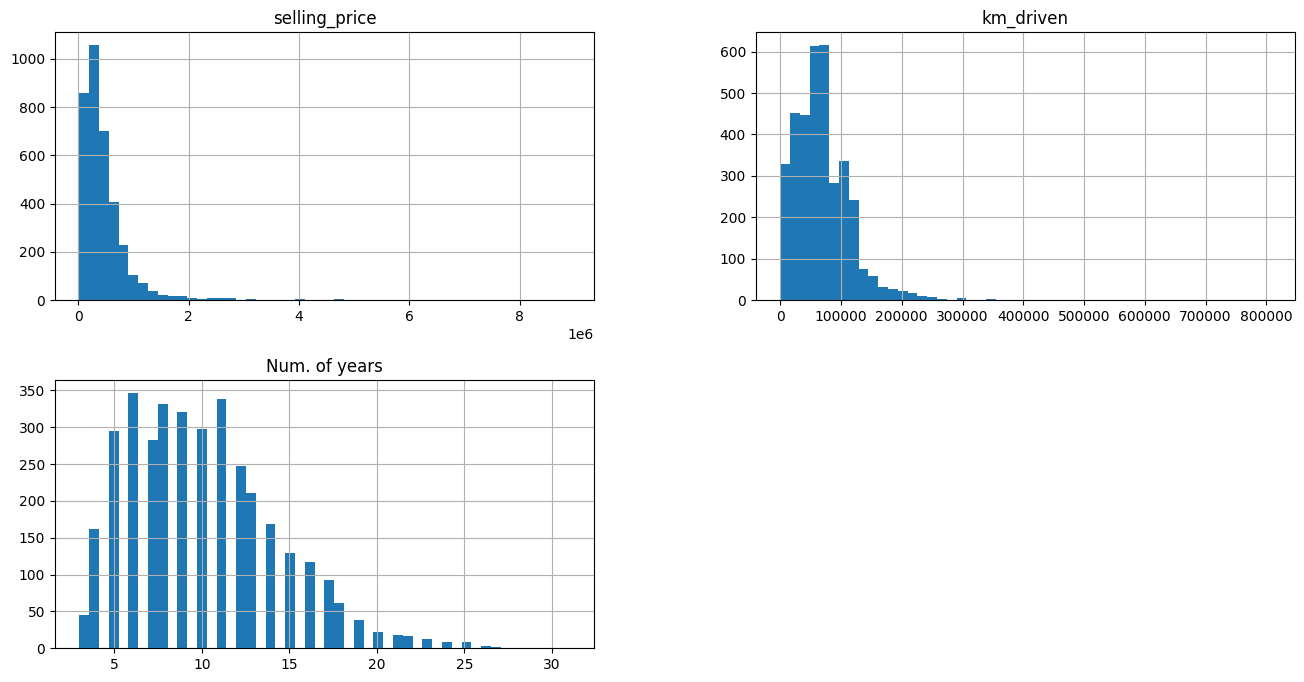

In [42]:
data.hist(bins=50, figsize=(16,8))
plt.show()

In [43]:
corr_matrix = data[['Num. of years', 'selling_price', 'km_driven']].corr()
corr_matrix['selling_price']

Num. of years   -0.424260
selling_price    1.000000
km_driven       -0.187359
Name: selling_price, dtype: float64

In [44]:
data['selling_price'].describe()

count    3.577000e+03
mean     4.739125e+05
std      5.093018e+05
min      2.000000e+04
25%      2.000000e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

In [45]:
data["name"].nunique()

1491

In [46]:
cat_features = data.select_dtypes(exclude=["int64"]).columns

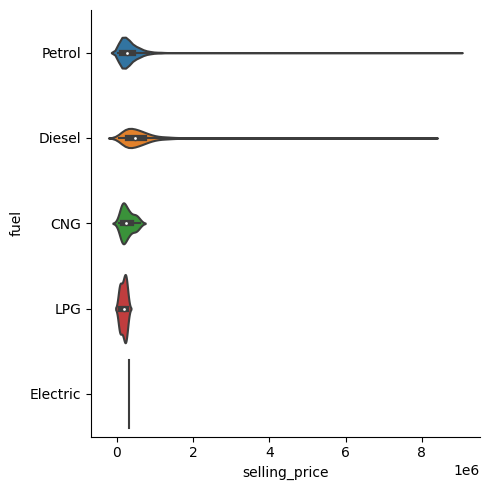

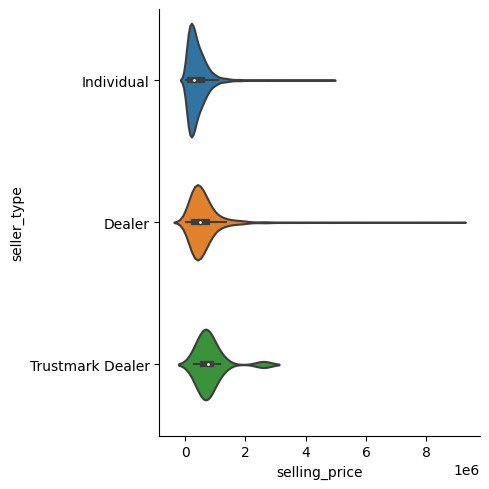

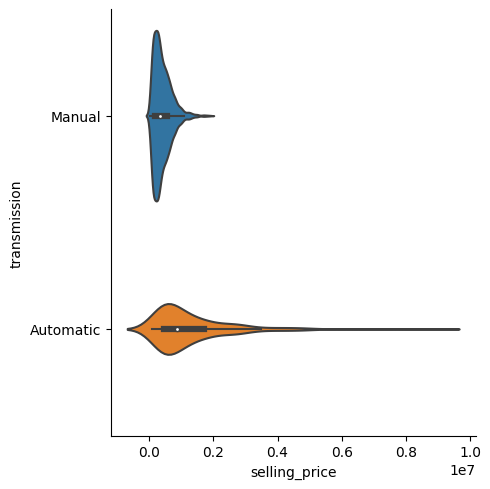

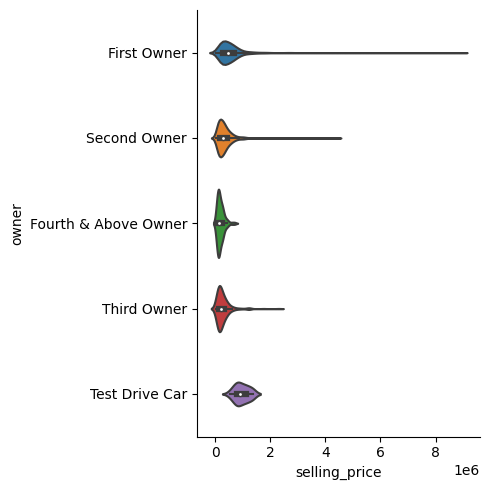

In [47]:
# Categorical plots in the shape of Violin
for i in cat_features:
    if(len(data[i].unique())<10 and len(data[i].unique())>0):
        sns.catplot(x="selling_price", y=i,kind="violin", split=True, data=data)

In [48]:
data["name"].value_counts()

name
Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: count, Length: 1491, dtype: int64

In [49]:
data[['name']].iloc[0]

name    Maruti 800 AC
Name: 0, dtype: object

In [50]:
data['name_model'] = data['name'].str.split().str[:2].str.join(' ')
data.drop('name', axis=1, inplace=True)

In [51]:
data["name_model"].value_counts()

name_model
Maruti Swift          270
Maruti Alto           228
Maruti Wagon          139
Hyundai i20           113
Hyundai Verna         103
                     ... 
Mahindra NuvoSport      1
Maruti S-Presso         1
Toyota Yaris            1
Ford Fusion             1
Toyota Qualis           1
Name: count, Length: 189, dtype: int64

In [52]:
data.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Num. of years,name_model
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti 800
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti Wagon


In [53]:
from sklearn.preprocessing import LabelEncoder

endcoder = LabelEncoder()

data["name_model"] = endcoder.fit_transform(data["name_model"])

In [54]:
data.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Num. of years,name_model
0,60000,70000,Petrol,Individual,Manual,First Owner,16,97
1,135000,50000,Petrol,Individual,Manual,First Owner,16,117


In [55]:
cat_features = cat_features.drop('name')
cat_features

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [57]:
data = pd.get_dummies(data, columns=cat_features, drop_first=True)
data.head()

,selling_price,km_driven,Num. of years,name_model,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,97,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,16,117,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,11,69,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,6,27,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,9,47,True,False,False,False,True,False,True,False,True,False,False


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 3577 non-null   int64
 1   km_driven                     3577 non-null   int64
 2   Num. of years                 3577 non-null   int64
 3   name_model                    3577 non-null   int64
 4   fuel_Diesel                   3577 non-null   bool 
 5   fuel_Electric                 3577 non-null   bool 
 6   fuel_LPG                      3577 non-null   bool 
 7   fuel_Petrol                   3577 non-null   bool 
 8   seller_type_Individual        3577 non-null   bool 
 9   seller_type_Trustmark Dealer  3577 non-null   bool 
 10  transmission_Manual           3577 non-null   bool 
 11  owner_Fourth & Above Owner    3577 non-null   bool 
 12  owner_Second Owner            3577 non-null   bool 
 13  owner_Test Drive Car          357

<Axes: >

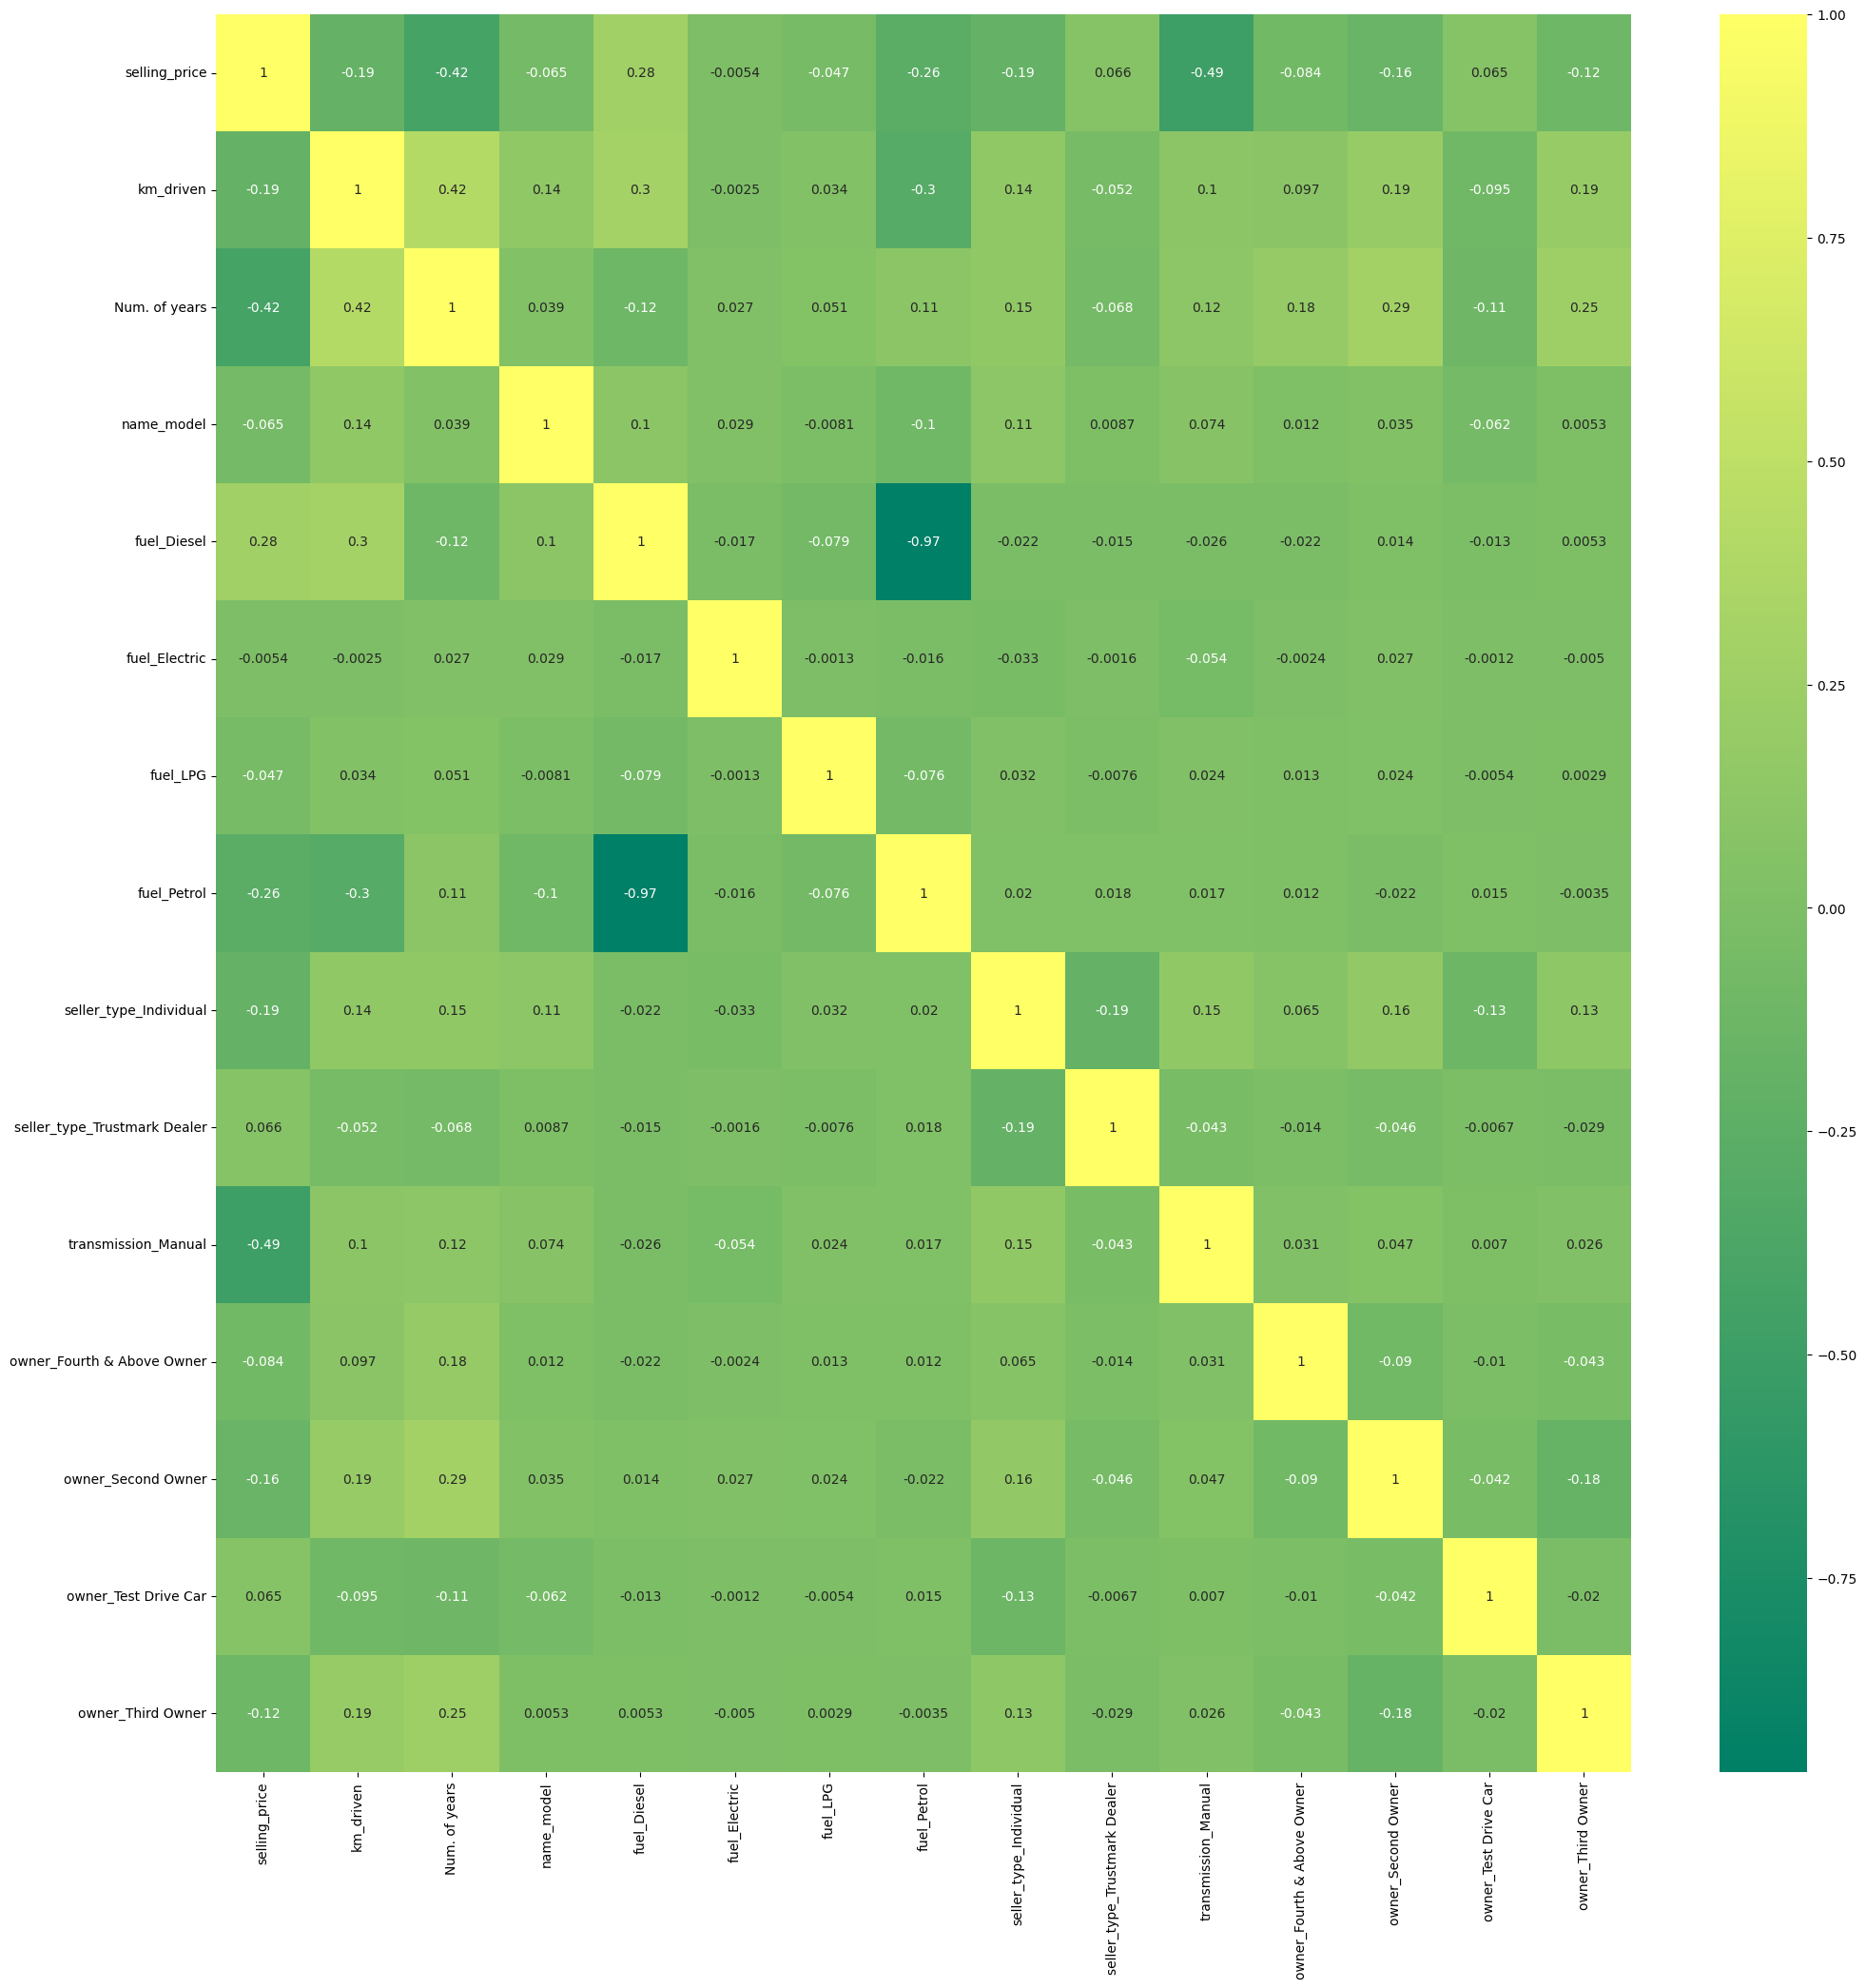

In [59]:
plt.figure(figsize=(24,24))

sns.heatmap(data.corr(),annot=True,cmap='summer')

In [60]:
X = data.drop('selling_price', axis=1)
y = data['selling_price']

In [61]:
print(X.shape)
print(y.shape)

(3577, 14)
(3577,)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

model.score(X_test, y_test).round(3)

0.542

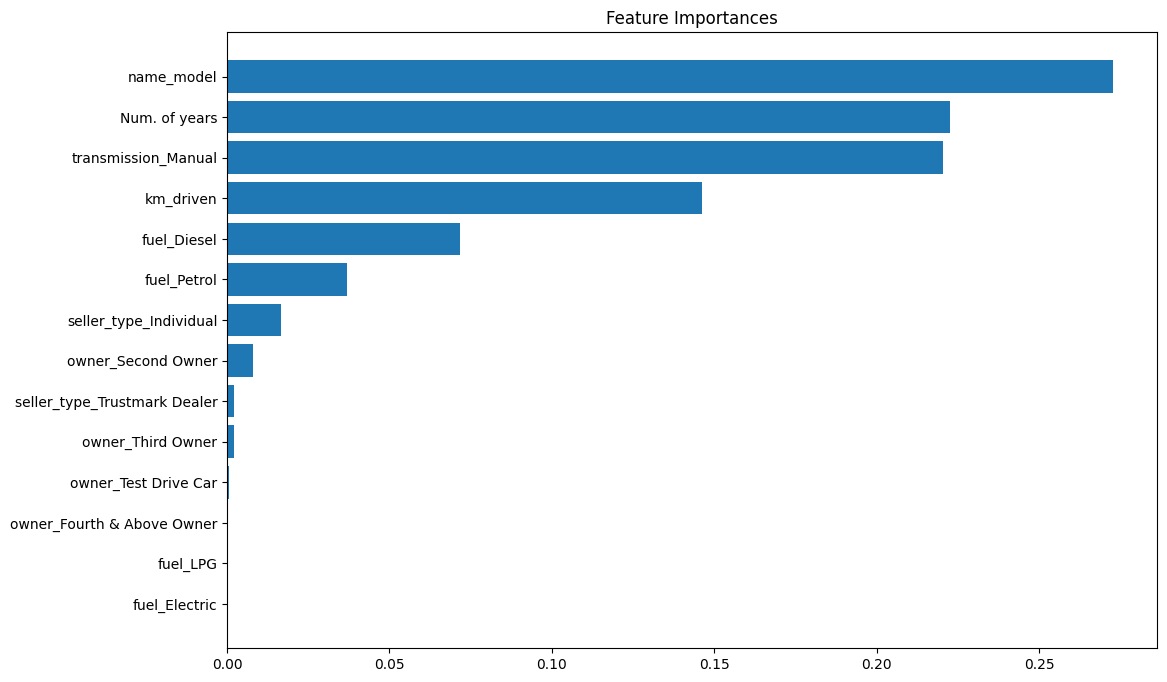

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Получите важности фич
importances = model.feature_importances_

# Сделайте DataFrame для лучшего отображения
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Отсортируйте по важности
features_df = features_df.sort_values(by='Importance', ascending=False)

# Отобразите важности фич
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(features_df['Feature'], features_df['Importance'])
plt.gca().invert_yaxis()  # инвертируйте ось Y, чтобы наиболее важные фичи были сверху
plt.show()


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

print(f"test-set score: {gbr.score(X_test, y_test):.3f}")

test-set score: 0.546
